In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
# from google.colab.patches import cv2_imshow # for image display 
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt

C:\Users\radha\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


[[207. 207. 207. ... 244. 244. 244.]
 [207. 207. 208. ... 244. 244. 244.]
 [208. 208. 208. ... 244. 244. 244.]
 ...
 [201. 206. 210. ... 120. 120. 120.]
 [199. 204. 209. ... 121. 121. 120.]
 [191. 197. 202. ... 122. 121. 120.]]


(720, 960)

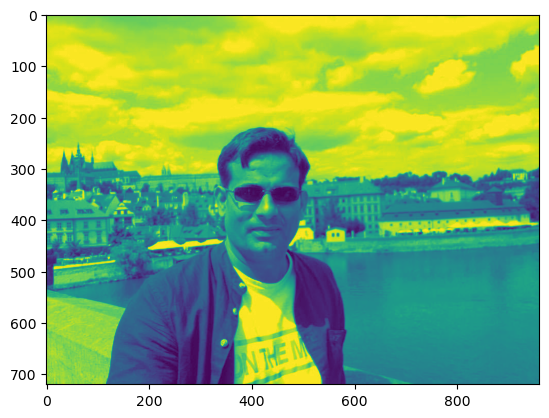

In [2]:
## ToDo: Load Image
url = "https://channeli.in/api/django_filemanager/media_files/12069/"
myImg = io.imread(url)
gray_image = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
img_mat = np.array(list(gray_image),float)
print(img_mat)
img_mat.shape
plt.imshow(img_mat)
img_mat.shape

In [3]:
# Scale the image matrix before SVD
img_mat_scaled = (img_mat - img_mat.mean())/img_mat.std()

In [4]:
# Perform SVD using np.linalg.svd
U, s, V = np.linalg.svd(img_mat_scaled)

In [5]:
# Compute Variance explained by each singular vector
var_explained = np.round(s**2/np.sum(s**2), decimals = 3)

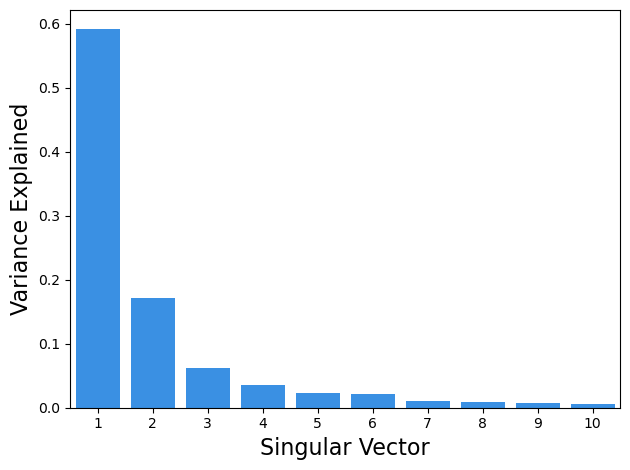

In [6]:
import seaborn as sns
sns.barplot(x=list(range(1,11)),
           y = var_explained[0:10], color = "dodgerblue")
plt.xlabel('Singular Vector', fontsize = 16)
plt.ylabel("Variance Explained", fontsize = 16)
plt.tight_layout()
plt.savefig('svd_scree_plot.png',dpi = 150)
# plt.savefig("Line_Plot_with_Pandas_Python.jpg")

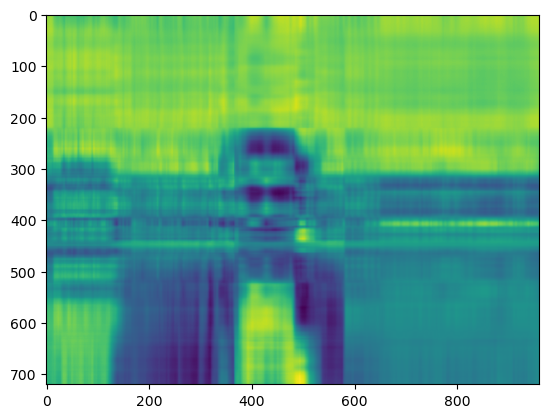

In [7]:
# Reconstruction with top 5 singular values
num_components = 5
reconst_img_5 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components,:])))
plt.imshow(reconst_img_5)

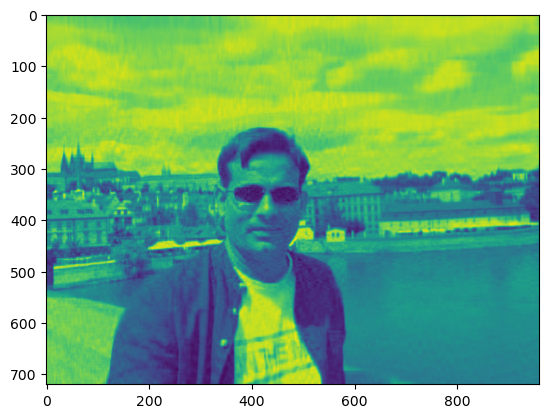

In [8]:
# Reconstruction with top 50 singular values
num_components = 50
reconst_img_50 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components,:])))
plt.imshow(reconst_img_50)

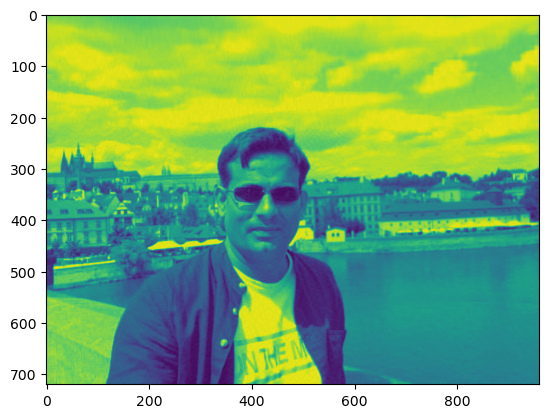

In [9]:
# Reconstruction with top 100 singular values
num_components = 100
reconst_img_100 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components,:])))
plt.imshow(reconst_img_100)

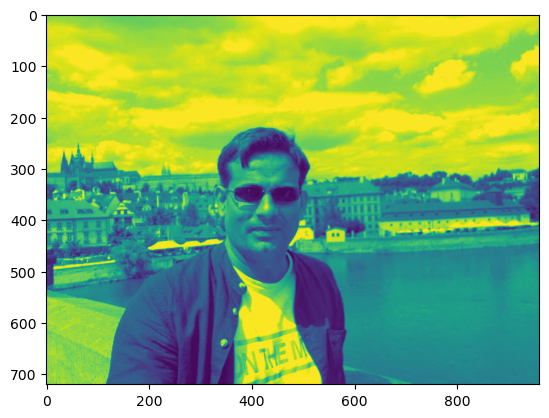

In [11]:
# Reconstruction with top 650 singular values
num_components = 650
reconst_img_650 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components,:])))
plt.imshow(reconst_img_650)

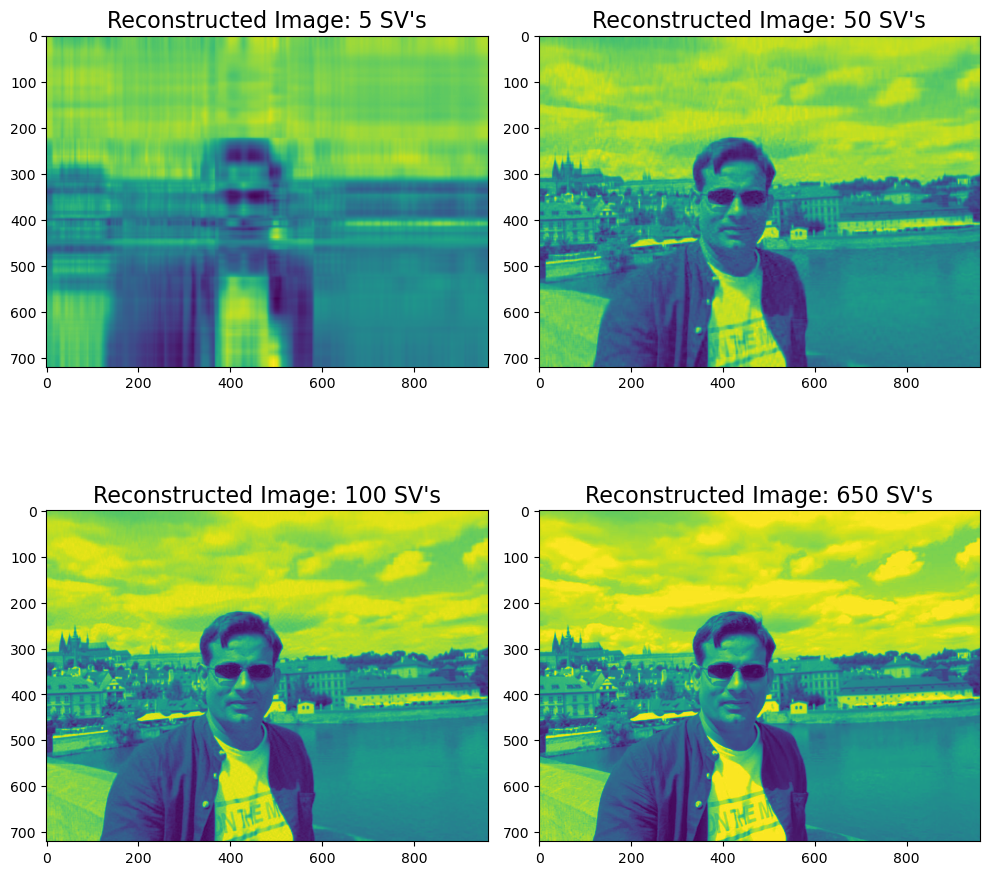

In [13]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
axs[0,0].imshow(reconst_img_5)
axs[0,0].set_title("Reconstructed Image: 5 SV's", size = 16)
axs[0,1].imshow(reconst_img_50)
axs[0,1].set_title("Reconstructed Image: 50 SV's", size = 16)
axs[1,0].imshow(reconst_img_100)
axs[1,0].set_title("Reconstructed Image: 100 SV's", size = 16)
axs[1,1].imshow(reconst_img_650)
axs[1,1].set_title("Reconstructed Image: 650 SV's", size = 16)
plt.tight_layout()